In [242]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import Sequence, to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow

In [211]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Volumes/Misc/conda/miniconda3/envs/opencv_lab/lib/python3.7/site-packages
Requires: absl-py, wrapt, gast, protobuf, tensorflow-estimator, keras-preprocessing, six, wheel, numpy, tensorboard, astor, termcolor, keras-applications, grpcio, google-pasta
Required-by: 
Name: Keras
Version: 2.2.5
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /Volumes/Misc/conda/miniconda3/envs/opencv_lab/lib/python3.7/site-packages
Requires: pyyaml, numpy, keras-applications, h5py, scipy, six, keras-preprocessing
Required-by: 


In [290]:
width, height = 240, 200
input_shape = (width, height, 1)
DATA_DIR = "data"
    # Parameters

In [327]:
def get_image_n_labels(paths):
    total_images = []
    total_labels = []
    for path in paths:
        
        all_names = os.listdir(os.path.join(path, "images"))
        all_names = sorted(all_names, key=lambda f: int(f.split('_')[1]))
        labels = None
        # print(all_names)
        with open(os.path.join(path,"labels","labels.txt")) as f:
            labels = f.read().split('\n')
        assert len(labels) == len(all_names), str(len(labels)) + "!=" + str(len(all_names))
#         print(f'Total count ', len(all_names))
        
        all_images = read_all_images(all_names)
#         if total_images is None:
#             total_images = all_images
#         else:
#             total_images = total_images +  all_images
        total_images = [*total_images, *all_images]
        labels = to_categorical(labels).astype(np.uint8)
#         if total_labels is None:
#             total_labels = labels
#         else:
#             total_labels = total_labels + labels
        total_labels = [*total_labels, *labels]
    return np.array(total_images), np.array(total_labels)

def read_image(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     img_gray = cv2.imread(image_path)
    if img_gray is None:
        raise Exception("Image not found at", image_path)
    img_gray = cv2.resize(img_gray, (width, height))
    img_gray = img_gray//255
    img_gray.shape = (width, height, 1)
    return img_gray
def read_all_images(all_names):
    result = []
    for file_name in all_names:
        result.append(read_image(os.path.join(training_path, file_name)))
    return result
train_X, train_Y = get_image_n_labels([os.path.join(DATA_DIR, "u_turn_data"), os.path.join(DATA_DIR, "way_back")])
# train_Y = results = list(map(float, labels))
# train_Y = to_categorical(labels)
assert len(train_X) == len(train_Y), "trainX != train Y"
print(len(train_X))

2767


In [320]:
print(train_Y[0].dtype)

uint8


In [71]:
'Generates data for Keras'
class DataGenerator(Sequence):
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1, shuffle=True, root_path=None):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.root_path = root_path
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim))
        y = np.empty((self.batch_size), dtype=int)
        
        width, height = 120, 100
        # Generate data
        for i, file_name in enumerate(list_IDs_temp):
            # Store sample
            img_gray = cv2.imread(os.path.join(self.root_path, file_name), cv2.IMREAD_GRAYSCALE)
            print(img_gray.shape)
            img_gray = cv2.resize(img_gray, (width, height))
            img_gray.shape = (width, height, 1)
            X[i,] = img_gray
            # Store class
            print(i)
            y[i] = self.labels[i]
        return X, y
params = {'dim': input_shape,
          'batch_size': 4,
          'n_channels': 1,
          'shuffle': False}
training_generator = DataGenerator(all_names, labels, **params, root_path=training_path)

Total count  337


In [ ]:
def load_house_images(df, inputPath):
    # initialize our images array (i.e., the house images themselves)
    images = []
 
    # loop over the indexes of the houses
    for i in df.index.values:
        # find the four images for the house and sort the file paths,
        # ensuring the four are always in the *same order*
        basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
        housePaths = sorted(list(glob.glob(basePath)))

In [ ]:

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))

model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(1, activation="linear"))
model.add(BatchNormalization())
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(3, activation="softmax"))

opt = Adam(lr=1e-3, decay=1e-3 / 200)
# model.compile(loss="mean_absolute_percentage_error", optimizer = opt)
# model.compile(loss="categorical_crossentropy", optimizer = opt)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1
    # define the model input
    inputs = Input(shape=inputShape)
    # loop over the number of filters
#     for (i, f) in enumerate(filters):
#         # if this is the first CONV layer then set the input
#     # appropriately
#         if i == 0:
#             x = inputs
 
#         # CONV => RELU => BN => POOL
#         x = Conv2D(f, (3, 3), padding="same")(x)
#         x = Activation("relu")(x)
#         x = BatchNormalization(axis=chanDim)(x)
#         x = MaxPooling2D(pool_size=(2, 2))(x)
#             # flatten the volume, then FC => RELU => BN => DROPOUT
#         x = Flatten()(x)
#         x = Dense(16)(x)
#         x = Activation("relu")(x)
#         x = BatchNormalization(axis=chanDim)(x)
#         x = Dropout(0.5)(x)

#         # apply another FC layer, this one to match the number of nodes
#         # coming out of the MLP
#         x = Dense(1)(x)
#         x = Activation("relu")(x)

#         # check to see if the regression node should be added
#         if regress:
#             x = Dense(1, activation="linear")(x)

#         # construct the CNN
#         model = Model(inputs, x)

#         # return the CNN
#         return model

In [288]:
model = load_model("u_turn_1_14_gray_classification.h5")

In [ ]:
train_X = np.array(train_X)
history =  model.fit(train_X, train_Y, epochs=50, batch_size=32, shuffle=True)
# history = model.fit_generator(generator=training_generator,
#                     use_multiprocessing=True,
#                     workers=1)

Epoch 1/50
2767/2767 [==============================] - 108s 39ms/step - loss: 1.0842 - accuracy: 0.7080
Epoch 2/50
2767/2767 [==============================] - 107s 39ms/step - loss: 0.5405 - accuracy: 0.7203
Epoch 3/50
2767/2767 [==============================] - 105s 38ms/step - loss: 0.5014 - accuracy: 0.7167
Epoch 4/50
2767/2767 [==============================] - 106s 38ms/step - loss: 0.4750 - accuracy: 0.7120
Epoch 5/50
2767/2767 [==============================] - 103s 37ms/step - loss: 0.4574 - accuracy: 0.7315
Epoch 6/50
2767/2767 [==============================] - 102s 37ms/step - loss: 0.4590 - accuracy: 0.7217
Epoch 7/50
2767/2767 [==============================] - 107s 39ms/step - loss: 0.4389 - accuracy: 0.7344
Epoch 8/50
2767/2767 [==============================] - 118s 43ms/step - loss: 0.4381 - accuracy: 0.7297
Epoch 9/50
2767/2767 [==============================] - 115s 42ms/step - loss: 0.4284 - accuracy: 0.7380
Epoch 10/50
2767/2767 [==============================] 

In [325]:
#saving model
model.save("u_turn_1_14_gray_classification_all.h5")

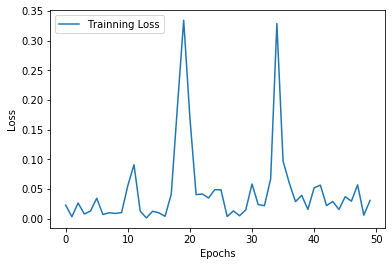

In [275]:
def PlotLearningCurve(epoch, trainingloss):
    plt.plot(trainingloss)
#     plt.plot(validationloss)
    plt.xlabel('Epochs')
    plt.legend(['Trainning Loss'])
    plt.ylabel('Loss')
    plt.show()
PlotLearningCurve(None , history.history['loss'])

-0.000112560905


In [326]:
from keras.models import load_model
tmp_model = load_model("u_turn_1_14_gray_classification_all.h5")
# print(tmp_model.layers[-1].get_weights())

test_image = read_image(os.path.join(training_path, "img_97_.jpg"))
print(test_image.shape)
preds = tmp_model.predict(np.array([test_image]))[0]
print(np.argmax(preds))

(240, 200, 1)
2
